# 0. Prerequisite

In [ ]:
# https://research.google.com/colaboratory/local-runtimes.html

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

# Step 18. 1-Dense Layer(1 units) - AND/OR classification

## p.138

### 1~3 line - import

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 5~11 line - dataset

In [4]:
#1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)
y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)   # AND
##y_true = np.array([[0],[1],[1],[1]], dtype = np.float32)  # OR

In [5]:
X.shape

(4, 2)

In [6]:
X

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [7]:
y_true.shape

(4, 1)

In [8]:
y_true

array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

### 13~17 line - model

In [9]:
#2
model = tf.keras.Sequential()
# activation=tf.keras.activations.sigmoid
model.add(tf.keras.layers.Dense(units=1, input_dim=2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________



* Perceptrons include a single layer of input units — including one bias unit — and a single output unit  

* A sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve.

| Perceptron | Logistic Function |
| --------------- | --------------- |
| <img src="https://res.cloudinary.com/practicaldev/image/fetch/s--DXCwIVYw--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://cdn-images-1.medium.com/max/2000/0%2AwOYoifz24Wz_I152." width="400"/> | <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*Xu7B5y9gp0iL5ooBj7LtWw.png" width="400"/> |



### 19~24 line - configure

In [10]:
#3
# model.optimizer.lr: 0.001
##model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy']) 
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
##model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

### 26 line - train

In [15]:
ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=0) #silent

### 34~37 line - evaluate

In [16]:
#4
test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
print("test_loss:", test_loss)
print("test_acc:", test_acc)

1/1 - 0s - loss: 8.6805e-05 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
test_loss: 8.680452447151765e-05
test_acc: 1.0


### 39~43 line - predict

In [17]:
y_pred = model.predict(X)
print("y_pred:", y_pred)
y_label = (y_pred> 0.5).astype(int) # Z = np.round(Z)
print("y_label:", y_label)

1/1 [==============================] - 0s 19ms/step
y_pred: [[1.2610209e-06]
 [1.0102620e-02]
 [1.0102620e-02]
 [9.8803788e-01]]
y_label: [[0]
 [0]
 [0]
 [1]]


### 45~92 line - plot

In [ ]:
#5: calculate the decision boundary line, w0*x + w1*y + b = 0
##print(model.get_weights())
w0, w1 = model.layers[0].weights[0].numpy().flatten()
b = model.layers[0].bias.numpy()[0]
print("{:>.2f}*x {:+.2f}*y {:+.2f} = 0".format(w0, w1, b))

4.72*x +4.72*y -7.10 = 0


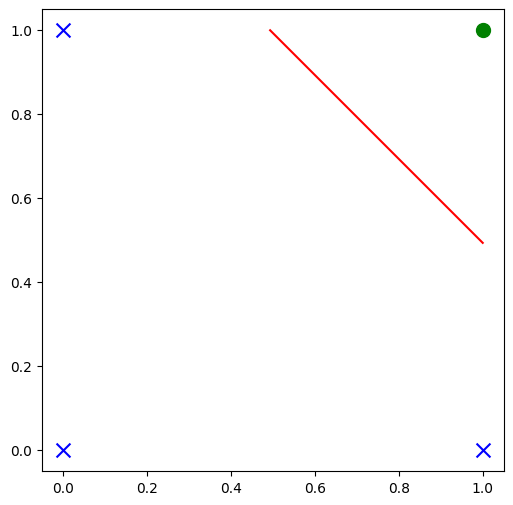

In [ ]:
##print("len(model.layers):", len(model.layers)) # 1
##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

label = y_true.flatten()
##plt.scatter(X[:, 0], X[:,1], c=label, s = 100)
plt.scatter(X[label==0, 0], X[label==0, 1], marker='x', c="blue", s= 100)
plt.scatter(X[label==1, 0], X[label==1, 1], marker='o', c="green",s= 100)
##for x,target in zip(X, y_true):
##        plt.plot(x[0],x[1],'go' if (target == 1.0) else 'bx', markersize= 10)

def clippingLineBox(line, box):
    w0, w1, b = line
    xmin, xmax, ymin, ymax = box
    
    y0 =-(w0*xmin + b)/w1
    y1 =-(w0*xmax + b)/w1

    x0 = -(w1*ymin + b)/w0
    x1 = -(w1*ymax + b)/w0    

    xpoints = []
    ypoints = []
    if ymin <= y0 <= ymax:
        xpoints.append(xmin)
        ypoints.append(y0)
    if ymin <= y1 <= ymax:
        xpoints.append(xmax)
        ypoints.append(y1)
        
    if xmin <= x0 <= xmax:
        xpoints.append(x0)
        ypoints.append(ymin)
    if xmin <= x1 <= xmax:
        xpoints.append(x1)
        ypoints.append(ymax)
    return xpoints, ypoints
           
# clip the line against a box, and draw
xpoints, ypoints = clippingLineBox(line=(w0, w1, b), box=(0, 1, 0, 1))
plt.plot(xpoints, ypoints, color='red')
plt.show()


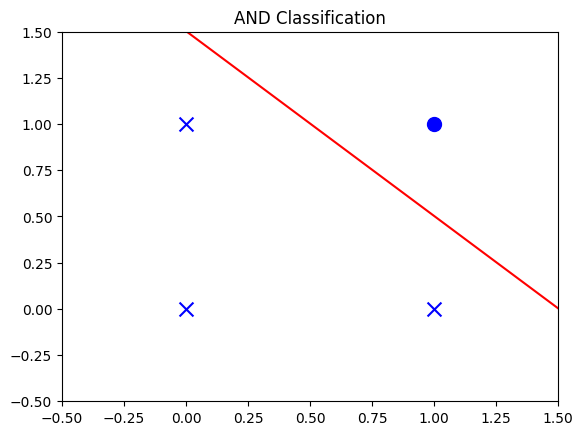

In [ ]:
first = lambda x: x[0]
second = lambda x: x[1]

def plot_gate(points, y_fn, title):
  fig, ax = plt.subplots()
  for point, marker in points:
    ax.scatter(first(point), second(point), marker=marker, c='blue', s=100)

  x = np.linspace(-.0, 2., 100)
  y = y_fn(x)
  ax.plot(x, y, c='red')

  ax.set_xlim(-.5, 1.5)
  ax.set_ylim(-.5, 1.5)
  ax.set_title(title)
  plt.show()

# w0 * x + w1 * y + b = 0
# y = -w0/w1x - b/w1
y = lambda x: -x*(w0/w1) + (-b/w1)
points = [((1, 1), 'o'), ((0, 0), 'x'), ((0, 1), 'x'), ((1, 0), 'x')]
plot_gate(points, y, 'AND Classification')

## p.142

### 1~3 line - import

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 5~12 line - dataset

In [ ]:
#1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

#y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)    # AND
y_true = np.array([[0],[1], [1],[1]], dtype = np.float32)  # OR

### line 14~22 - model

In [ ]:
#2
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=2, activation='sigmoid'))
model.summary()

##model = tf.keras.Sequential()
##model.add(tf.keras.layers.Input(shape = (2,))) # shape = 2
##model.add(tf.keras.layers.Dense(units=1))
##model.add(tf.keras.layers.Activation('sigmoid'))
##model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


### 24~27 line - configure

In [ ]:
#3
##opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

### 29 line - train

In [ ]:
ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=0)

### 37~40 line - evaluate

In [ ]:
#4
test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
print("test_loss:", test_loss)
print("test_acc:", test_acc)

1/1 - 0s - loss: 0.0076 - accuracy: 1.0000 - 115ms/epoch - 115ms/step
test_loss: 0.007584649603813887
test_acc: 1.0


### 42~43 line - predict

In [ ]:
y_pred = model.predict(X)
print("y_pred:", y_pred)
y_label = (y_pred> 0.5).astype(int)
print("y_label:", y_label)

1/1 [==============================] - 0s 44ms/step
y_pred: [[0.01539954]
 [0.9927008 ]
 [0.99253553]
 [0.9999991 ]]
y_label: [[0]
 [1]
 [1]
 [1]]


### 48~74 line - plot

In [ ]:
#5: calculate the decision boundary line, w0*x + w1*y + b = 0
##print(model.get_weights())
w0, w1 = model.layers[0].weights[0].numpy().flatten()
b = model.layers[0].bias.numpy()[0]
print("{:>.2f}*x {:+.2f}*y {:+.2f} = 0".format(w0, w1, b))

9.05*x +9.07*y -4.16 = 0


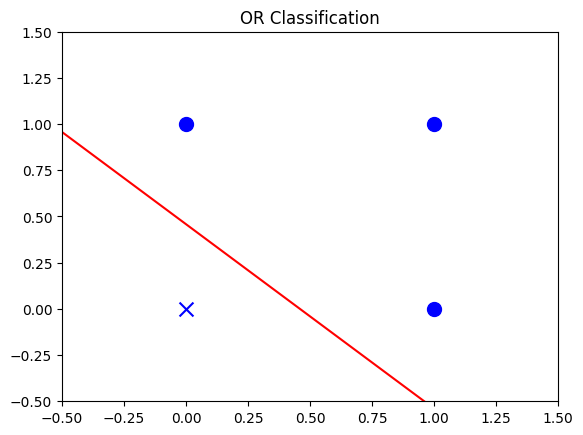

In [ ]:
first = lambda x: x[0]
second = lambda x: x[1]

def plot_gate(points, y_fn, title):
  fig, ax = plt.subplots()
  for point, marker in points:
    ax.scatter(first(point), second(point), marker=marker, c='blue', s=100)

  x = np.linspace(-.5, 2., 100)
  y = y_fn(x)
  ax.plot(x, y, c='red')

  ax.set_xlim(-.5, 1.5)
  ax.set_ylim(-.5, 1.5)
  ax.set_title(title)
  plt.show()

# w0 * x + w1 * y + b = 0
# y = -w0/w1x - b/w1
y = lambda x: -x*(w0/w1) + (-b/w1)
points = [((1, 1), 'o'), ((0, 0), 'x'), ((0, 1), 'o'), ((1, 0), 'o')]
plot_gate(points, y, 'OR Classification')

Text(0.5, 1.0, 'OR Classification')

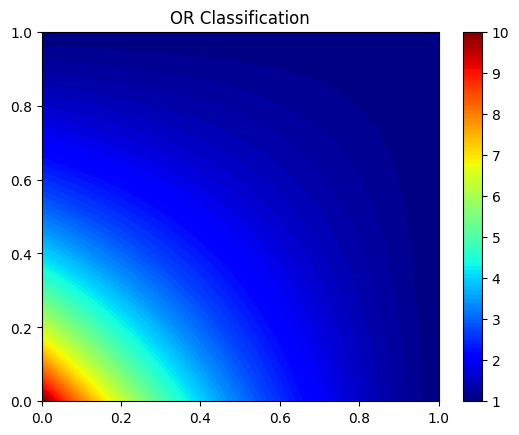

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
X,Y = np.meshgrid(x, y)
Z = 10**((X-1)*(Y-1))
con = ax.contourf(X, Y, Z, 100, cmap='jet')
fig.colorbar(con)
ax.set_title('OR Classification')

4/4 [==============================] - 0s 2ms/step


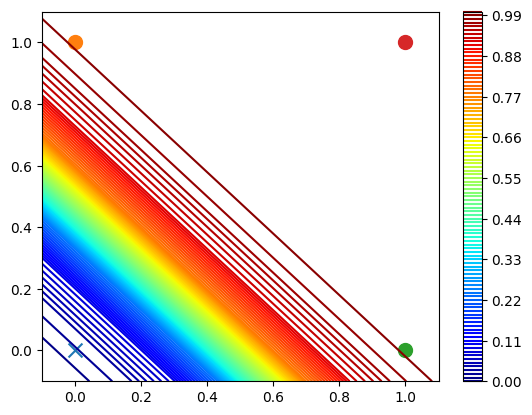

In [ ]:
fig, ax = plt.subplots()
plt.scatter(0,0, marker='x', s = 100)
plt.scatter(0, 1, marker='o', s = 100)
plt.scatter(1, 0, marker='o', s = 100)
plt.scatter(1, 1, marker='o', s = 100)
x = np.linspace(-.1, 1.1, 10)
y = np.linspace(-.1, 1.1, 10)
xx, yy = np.meshgrid(x, y)
sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
#Z = np.argmax(Z, axis = 1)
Z = Z.reshape(xx.shape)
con = plt.contour(xx, yy, Z, levels=100, cmap='jet')
fig.colorbar(con)
plt.show()

(array([[ 4.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  3.],
        [ 3.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  4.],
        [ 2.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  5.],
        [ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  6.],
        [ 0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  7.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  8.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  9.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]]),
 array([0.00254835, 0.10229351, 0.20203866, 0.3017838 , 0.40152895,
        0.50127411, 0.60101926, 0.70076442, 0.80050957, 0.90025473,
        0.99999988]),
 <a list of 10 BarContainer objects>)

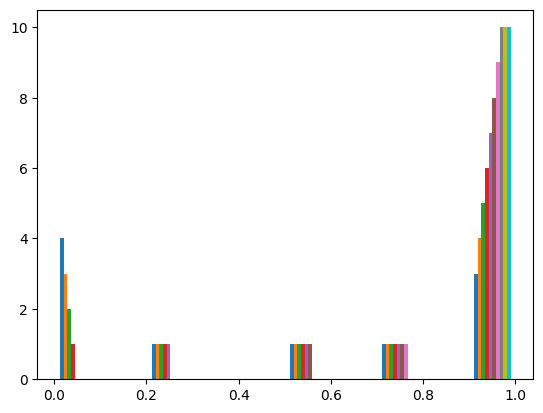

In [ ]:
plt.hist(Z)

# Step 19. 1-Dense Layer(2 units) - AND/OR classification

## p.145

### 1~3 line - import

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 5~12 line - dataset

In [19]:
#1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)   # AND
##y_true = np.array([[0],[1],[1],[1]], dtype = np.float32)  # OR

### 14~17 line - model

In [20]:
#2
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=2, input_dim=2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


### 19~22 line - configure

In [21]:
##opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt,
               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 24~30 line - train

In [22]:
ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=0)
##print("len(model.layers):", len(model.layers)) # 1
##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

### 32~39 line - evaluate

In [23]:
#3
##print(model.get_weights())
print("weights:", model.layers[0].weights[0].numpy())
print("bias:", model.layers[0].bias.numpy())
test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
test_loss

weights: [[-3.9669323  4.7437873]
 [-3.915584   4.7943068]]
bias: [ 6.531018  -6.5310187]
1/1 - 0s - loss: 0.0096 - accuracy: 1.0000 - 99ms/epoch - 99ms/step


0.009580499492585659

### 38~42 line - predict

In [24]:
y_pred = model.predict(X)
print("y_pred:", y_pred)

y_label = np.argmax(y_pred, axis = 1)
print("y_label:", y_label)

1/1 [==============================] - 0s 29ms/step
y_pred: [[9.9999785e-01 2.1243629e-06]
 [9.8728460e-01 1.2715385e-02]
 [9.8727417e-01 1.2725793e-02]
 [1.2634946e-02 9.8736507e-01]]
y_label: [0 0 0 1]


### 44~69 line - plot

313/313 [==============================] - 0s 620us/step


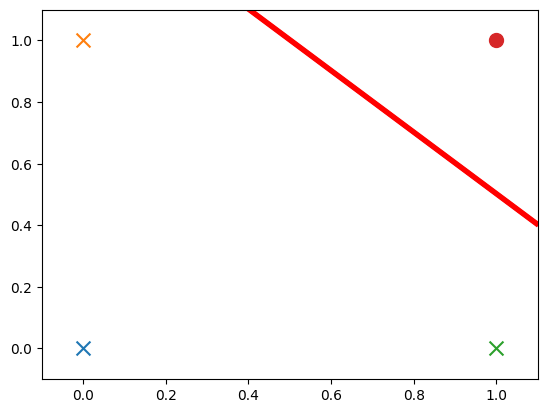

In [25]:
fig, ax = plt.subplots()
plt.scatter(0, 0, marker='x', s = 100)
plt.scatter(0, 1, marker='x', s = 100)
plt.scatter(1, 0, marker='x', s = 100)
plt.scatter(1, 1, marker='o', s = 100)
x = np.linspace(-.1, 1.1, 100)
y = np.linspace(-.1, 1.1, 100)
xx, yy = np.meshgrid(x, y)
sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = np.argmax(Z, axis = 1)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linewidths=2)
plt.show()

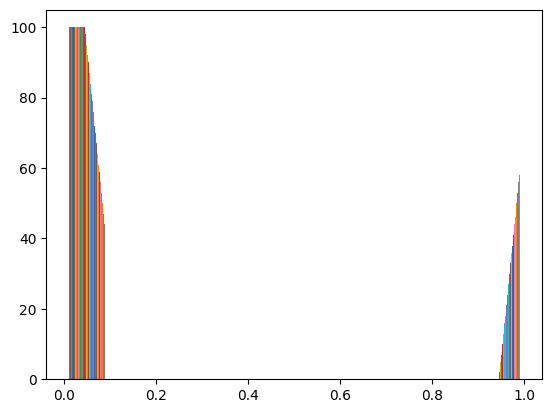

In [ ]:
plt.hist(Z)
plt.show()

## p.148

### 1~3 line - import

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 5~14 line - dataset

In [27]:
#1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

#y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)   # AND
y_true = np.array([[0],[1],[1],[1]], dtype = np.float32)  # OR
y_true = tf.keras.utils.to_categorical(y_true) 
print("y_true=", y_true)

y_true= [[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


### 16~19 line - model

In [28]:
#2
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=2, input_dim=2, activation='softmax')) # 정답은 1에 가깝게 오답은 0 에 가깝게
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


### 21~23 line - configure

In [31]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
# opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

### 25 line - train

In [32]:
ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=0)

### 33~38 - evaluate

In [33]:
#3
##print(model.get_weights())
print("weights:", model.layers[0].weights[0].numpy())
print("bias:", model.layers[0].bias.numpy())

test_loss, test_acc = model.evaluate(X, y_true, verbose=2)

weights: [[-10.071604   9.637472]
 [ -8.470505  10.125825]]
bias: [ 4.565758  -4.5655155]
1/1 - 0s - loss: 5.2807e-05 - accuracy: 1.0000 - 114ms/epoch - 114ms/step


### 39~43 line - predict

In [34]:
y_pred = model.predict(X)
print("y_pred:", y_pred)

y_label = np.argmax(y_pred, axis = 1)
print("y_label:", y_label)

1/1 [==============================] - 0s 32ms/step
y_pred: [[9.9989176e-01 1.0821598e-04]
 [7.7507728e-05 9.9992251e-01]
 [2.5474614e-05 9.9997449e-01]
 [2.1371495e-13 1.0000000e+00]]
y_label: [0 1 1 1]


### 45~70 line - plot

313/313 [==============================] - 0s 592us/step


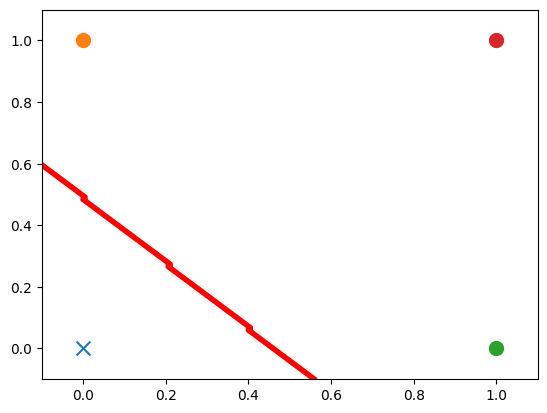

In [35]:
fig, ax = plt.subplots()
plt.scatter(0, 0, marker='x', s = 100)
plt.scatter(0, 1, marker='o', s = 100)
plt.scatter(1, 0, marker='o', s = 100)
plt.scatter(1, 1, marker='o', s = 100)
x = np.linspace(-.1, 1.1, 100)
y = np.linspace(-.1, 1.1, 100)
xx, yy = np.meshgrid(x, y)
sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = np.argmax(Z, axis = 1)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linewidths=2)
plt.show()

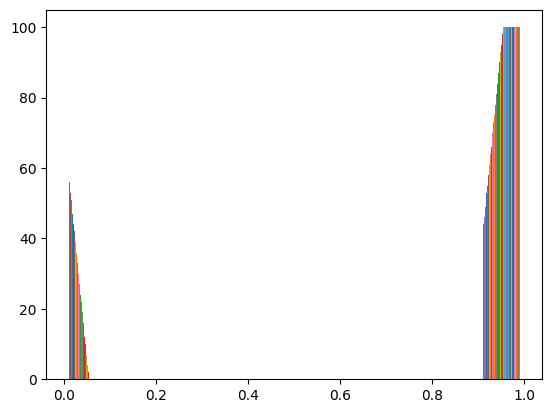

In [36]:
plt.hist(Z)
plt.show()

313/313 [==============================] - 0s 522us/step
(100, 100) (100, 100) (10000, 2) (10000, 2) (10000,)


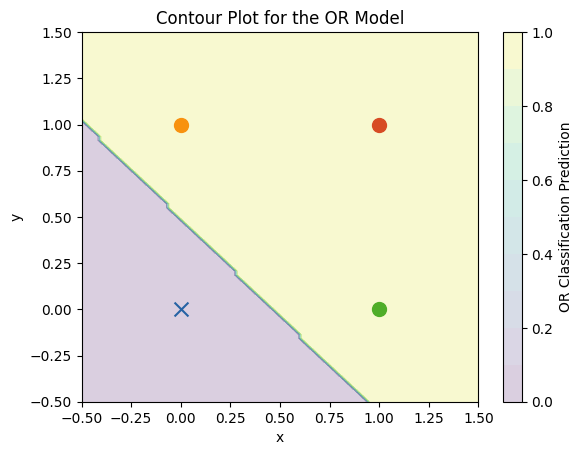

In [37]:
first = lambda x: x[0]
second = lambda x: x[1]

def plot_gate_as_contour(model, points, gate='OR'):
    fig, ax = plt.subplots()
    for p, m in points:
      ax.scatter(first(p), second(p), marker=m, s = 100)

    a_range = np.linspace(-.5, 1.5, 100)
    b_range = np.linspace(-.5, 1.5, 100)
    a_grid, b_grid = np.meshgrid(a_range, b_range)

    input_data = np.stack([a_grid.flatten(), b_grid.flatten()], axis=-1)
    results = model.predict(input_data)
    results_1d = np.argmax(results, axis = 1) if 1 < results.shape[1] else np.round(results)
    print(a_grid.shape, b_grid.shape, input_data.shape, results.shape, results_1d.shape)
    grid = results_1d.reshape(a_grid.shape)

    plt.contourf(a_grid, b_grid, grid, levels=10, alpha=.2)
    plt.colorbar(label='{:} Classification Prediction'.format(gate))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Contour Plot for the {:} Model'.format(gate))

    plt.show()

or_points = [((0, 0), 'x'), ((0, 1), 'o'), ((1, 0), 'o'), ((1, 1), 'o')]
plot_gate_as_contour(model, or_points)    

# Step 20. 2-Dense Layer - XOR classification


As shown in the figure, there is no way to separate the 1 and 0 predictions with a single classification line.

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--kf3HzMfo--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://cdn-images-1.medium.com/max/2000/0%2AqdRb80zUpJPtrbRD." width="400"/>

## p.152

### 1~3 line - import

In [38]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 5~13 line - dataset

In [45]:
#1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

##y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)# AND
##y_true = np.array([[0],[1],[1],[1]], dtype = np.float32) # OR
y_true = np.array([[0],[1],[1],[0]], dtype = np.float32)   # XOR
y_true

array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

### 15~20 line - model

In [40]:
#2
n = 10  # 10,  number of neurons in a hidden layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=n, input_dim=2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                30        
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


### 29~31 line - configure

In [46]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt,loss='mse', metrics=['accuracy'])
##model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

### 33 line - train

In [47]:
ret = model.fit(X, y_true, epochs=2000, batch_size=4, verbose=0)

### 50 line - evaluate

In [48]:
test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
##y_pred = model.predict(X)
##print("y_pred:", y_pred)
##
##y_label = (y_pred> 0.5).astype(int)
##print("y_label:", y_label)

1/1 - 0s - loss: 6.5019e-07 - accuracy: 1.0000 - 83ms/epoch - 83ms/step


### 57~79 line - plot

6/6 [==============================] - 0s 997us/step


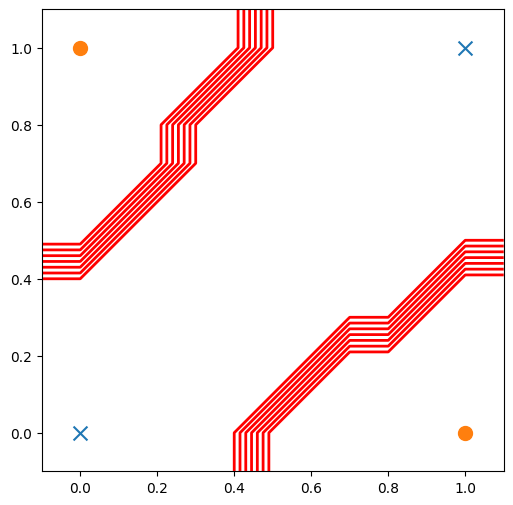

In [49]:
#4: calculate the decision boundary
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

label = y_true.flatten()
plt.scatter(X[label==0, 0], X[label==0,1], marker='x', s = 100)
plt.scatter(X[label==1, 0], X[label==1,1], marker='o', s = 100)
##for x,target in zip(X, y_true):
##        plt.plot(x[0],x[1],'go' if (target == 1.0) else 'bx')

h = 0.1
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = (Z> 0.5).astype(int) # Z = np.round(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linewidths=2)
plt.show()

313/313 [==============================] - 0s 582us/step
(100, 100) (100, 100) (10000, 2) (10000, 1) (10000, 1)


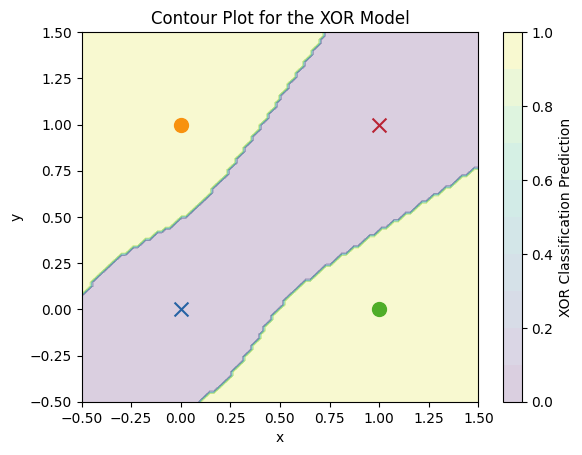

In [50]:
xor_points = [((0, 0), 'x'), ((0, 1), 'o'), ((1, 0), 'o'), ((1, 1), 'x')]
plot_gate_as_contour(model, xor_points, 'XOR')

## p.155

### 1~3 line - import

In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 5~16 line - dataset

In [52]:
#1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

# loss='sparse_categorical_crossentropy'
##y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)# AND
##y_true = np.array([[0],[1],[1],[1]], dtype = np.float32) # OR
y_true = np.array([[0],[1],[1],[0]], dtype = np.float32)   # XOR
y_true = tf.keras.utils.to_categorical(y_true) # loss='categorical_crossentropy'
print("y_true=", y_true)

y_true= [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


### 18~23 line - model

In [53]:
#2
model = tf.keras.Sequential()
n = 2  # number of neurons in a hidden layer
model.add(tf.keras.layers.Dense(units=n, input_dim=2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2)                 6         
                                                                 
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


### 25~29 line - configure

In [54]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
##model.compile(optimizer=opt,
##              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 31 line - train

In [55]:
ret = model.fit(X, y_true, epochs=1000, batch_size=4, verbose=0)

### 48 line - evaluate

In [56]:
test_loss, test_acc = model.evaluate(X, y_true, verbose=2)

1/1 - 0s - loss: 1.7017e-05 - accuracy: 1.0000 - 84ms/epoch - 84ms/step


### 57~79 line - plot

6/6 [==============================] - 0s 4ms/step


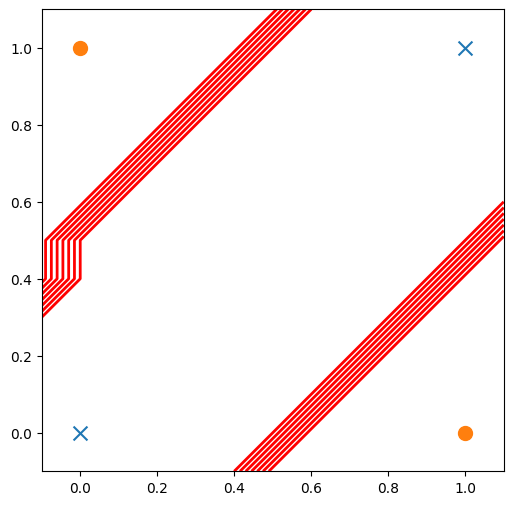

In [57]:
#4: calculate the decision boundary
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

##label = y_true.flatten()            # loss='sparse_categorical_crossentropy'
label = np.argmax(y_true, axis = 1) # loss='categorical_crossentropy'
plt.scatter(X[label==0, 0], X[label==0,1], marker='x', s = 100)
plt.scatter(X[label==1, 0], X[label==1,1], marker='o', s = 100)
##for x,target in zip(X, y_true):
##        plt.plot(x[0],x[1],'go' if (target == 1.0) else 'bx')

h = 0.1
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = np.argmax(Z, axis = 1)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linewidths=2)
plt.show()


313/313 [==============================] - 0s 545us/step
(100, 100) (100, 100) (10000, 2) (10000, 2) (10000,)


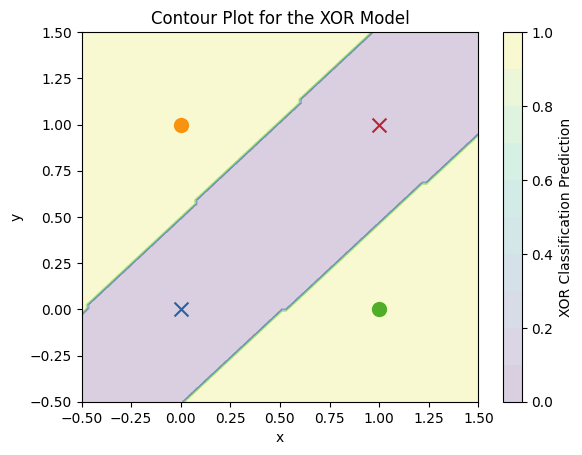

In [58]:
xor_points = [((0, 0), 'x'), ((0, 1), 'o'), ((1, 0), 'o'), ((1, 1), 'x')]
plot_gate_as_contour(model, xor_points, 'XOR')

# Step 21. 2D-Normal Distribution Data Generation & Classification

## p.160

### 1~3 line - import

In [59]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Note - multivariate_normal


> **random.multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)**

https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

* Draw random samples from a multivariate normal distribution.

* The multivariate normal, multinormal or Gaussian distribution is a generalization of the one-dimensional normal distribution to higher dimensions.

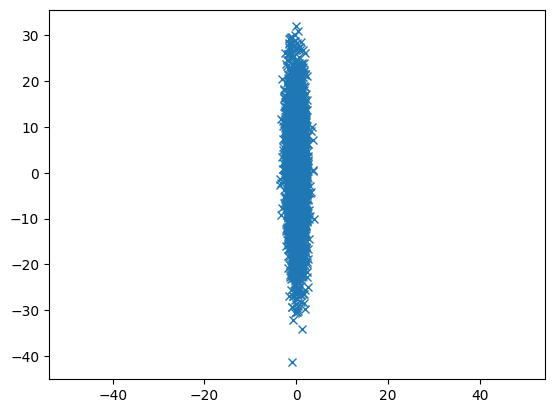

In [75]:
mean = [0, 0]
cov = [[1, -1], 
       [-1, 100]]  # covariance matrix
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

## Covariance

> <a href="https://en.wikipedia.org/wiki/Covariance">Covariance</a>

> In probability theory and statistics, covariance is a measure of the joint variability of two random variables.

**numpy.cov(m, y=None, rowvar=True, bias=False, ddof=None, fweights=None, aweights=None, *, dtype=None)**

* Estimate a covariance matrix, given data and weights.

https://numpy.org/doc/stable/reference/generated/numpy.cov.html

<img src="https://cdn1.byjus.com/wp-content/uploads/2021/03/covariance-2.png" width="800"/>

$$cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$$

In [61]:
x = np.array([[0, 2], [1, 1], [2, 0]]).T
print(x)
print(np.mean(x, axis=1))
mean = np.mean(x, axis=1)
x_mean = first(mean)
y_mean = second(mean)

xx = x[:1,] - x_mean
yy = x[1:] - y_mean
N = x.shape[1]-1
print(xx)
print(yy)
print(xx * yy)
print(sum((xx*yy).flatten()))
print(N)

cov = sum((xx*yy).flatten()) / N
print(cov)
np.cov(x) # Covariance Matrix

[[0 1 2]
 [2 1 0]]
[1. 1.]
[[-1.  0.  1.]]
[[ 1.  0. -1.]]
[[-1.  0. -1.]]
-2.0
2
-1.0


array([[ 1., -1.],
       [-1.,  1.]])

### 5~26 - dataset

In [62]:
#1
def createData(N=50):   
    np.random.seed(1)
    X0 = np.random.multivariate_normal(mean=[0.0, 0.0], cov= [[0.02, 0], 
                                                              [0, 0.01]], size=N)
    y_true0 = np.zeros(shape = (N,))

    X1 = np.random.multivariate_normal(mean=[0.0, 0.8], cov= [[0.01, 0], 
                                                              [0, 0.01]], size=N)
    y_true1 = np.ones(shape = (N,))

    X2 = np.random.multivariate_normal(mean=[0.3, 0.3], cov= [[0.01, 0], 
                                                              [0, 0.01]], size=N)
    y_true2 = np.ones(shape = (N,))*2

    X3 = np.random.multivariate_normal(mean=[0.8, 0.3], cov= [[0.01, 0], 
                                                              [0, 0.02]], size=N)
    y_true3 = np.ones(shape = (N,))*3

    X = np.vstack((X0, X1, X2, X3))
    y_true = np.hstack((y_true0, y_true1, y_true2, y_true3))
    return X, y_true

X, y_true = createData()   
y_true = tf.keras.utils.to_categorical(y_true) # 'mse', 'categorical_crossentropy'
print("y_true=", y_true)

y_true= [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [

### 28~40 line - model

In [63]:
#2
n = 10  # number of neurons in a hidden layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=n, input_dim=2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))
model.summary()

##model = tf.keras.Sequential()
##model.add(tf.keras.layers.Input(shape = (2,))) # shape = 2
##model.add(tf.keras.layers.Dense(units=n))
##model.add(tf.keras.layers.Activation('sigmoid'))
##model.add(tf.keras.layers.Dense(units=4))
##model.add(tf.keras.layers.Activation('softmax'))
##model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                30        
                                                                 
 dense_8 (Dense)             (None, 4)                 44        
                                                                 
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


### 42~46 line - configure


In [64]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
##model.compile(optimizer=opt,loss='mse', metrics=['accuracy'])
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
##model.compile(optimizer=opt,
##              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 48 line - train

In [65]:
ret = model.fit(X, y_true, epochs=100, verbose=0) # batch_size=32

### 65 line - evaluate

In [66]:
test_loss, test_acc = model.evaluate(X, y_true, verbose=2)

7/7 - 0s - loss: 0.0421 - accuracy: 0.9900 - 83ms/epoch - 12ms/step


### 67~70 line - predict

In [67]:
y_pred = model.predict(X)
##print("y_pred:", y_pred)
y_label = np.argmax(y_pred, axis = 1)
##print("y_label:", y_label)

7/7 [==============================] - 0s 662us/step


### 72~98 line - plot

confusion_matrix(C): tf.Tensor(
[[50  0  0  0]
 [ 0 50  0  0]
 [ 1  0 49  0]
 [ 0  0  1 49]], shape=(4, 4), dtype=int32)
493/493 [==============================] - 0s 609us/step


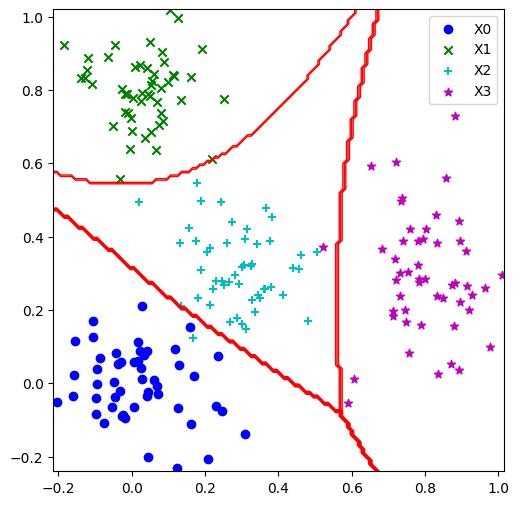

In [68]:
C = tf.math.confusion_matrix(np.argmax(y_true, axis = 1), y_label)
print("confusion_matrix(C):", C)

#4: calculate the decision boundary
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

markers = "ox+*"
colors  = "bgcm"
labels  = ("X0", "X1", "X2", "X3")
##label = y_true.flatten()          # loss='sparse_categorical_crossentropy'
label = np.argmax(y_true, axis = 1) # loss='mse', 'categorical_crossentropy'
for i, k in enumerate(np.unique(label)):
    plt.scatter(X[label==k, 0], X[label==k, 1],
                c = colors[i], marker=markers[i], label = labels[i])
plt.legend()

h = 0.01
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = np.argmax(Z, axis = 1)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linewidths=1)
plt.show()

In [69]:
X0, X1, X2, X3 = np.split(X, 4, axis=0)
print(X0.shape, X1.shape, X2.shape, X3.shape)
params = zip("ox+*", "bgcm", ["X0", "X1", "X2", "X3"])
keys = ['marker', 'color', 'label']
dict_params = [dict(zip(keys, p)) for p in params]

(50, 2) (50, 2) (50, 2) (50, 2)


313/313 [==============================] - 0s 579us/step
(100, 100) (100, 100) (10000, 2) (10000, 4) (10000,)


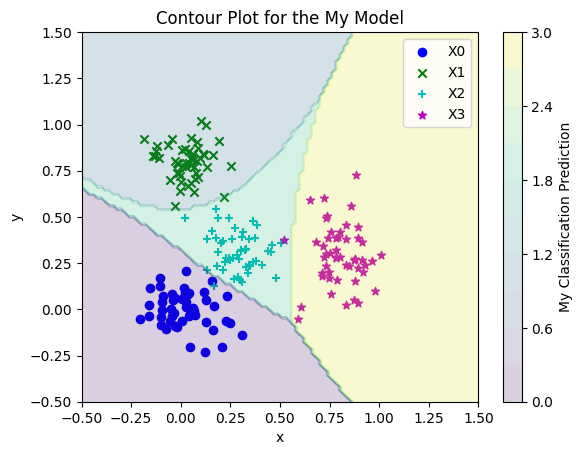

In [70]:
def plot_points(fig, ax, points, **kargs):
  x, y = np.split(points, 2, axis=1)
  ax.scatter(x, y, **kargs)
  ax.legend()

def plot_result_as_contour(model, model_name='My'):
    x_range = np.linspace(-.5, 1.5, 100)
    y_range = np.linspace(-.5, 1.5, 100)
    x_grid, y_grid = np.meshgrid(x_range, y_range)

    input_data = np.stack([x_grid.flatten(), y_grid.flatten()], axis=-1)
    z = model.predict(input_data)
    z_1d = np.argmax(z, axis = 1) if 1 < z.shape[1] else np.round(z)
    print(x_grid.shape, y_grid.shape, input_data.shape, z.shape, z_1d.shape)
    z_grid = z_1d.reshape(x_grid.shape)

    plt.contourf(x_grid, y_grid, z_grid, levels=10, alpha=.2)
    plt.colorbar(label='{:} Classification Prediction'.format(model_name))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Contour Plot for the {:} Model'.format(model_name))

    plt.show()
    
fig, ax = plt.subplots()
for x, p in zip([X0, X1, X2, X3], dict_params):
  plot_points(fig, ax, x, **p)

plot_result_as_contour(model)

# Step 22. IRIS Data Classification

## p.164

In [71]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

ModuleNotFoundError: No module named 'google.colab'

<img src="https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png"/>

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor)

* petal(꽃잎)
* sepal(꽃받침)

three species of Iris 

* Iris setosa, 
* Iris virginica and
* Iris versicolor

X.shape: (150, 4)
y_true.shape: (150,)
[[4.6 3.1 1.5 0.2]
 [6.3 2.9 5.6 1.8]
 [5.  3.2 1.2 0.2]]
[0. 2. 0.]


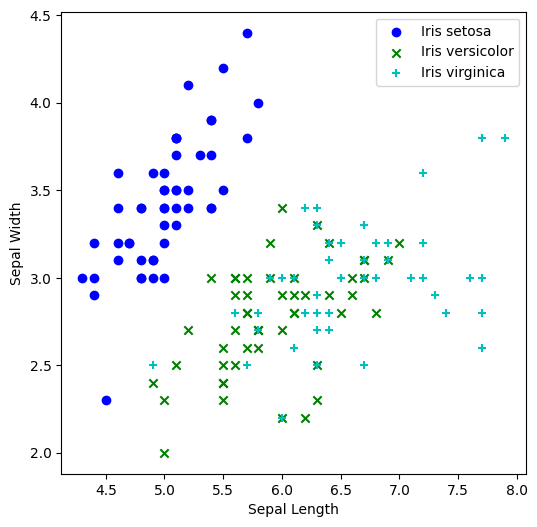

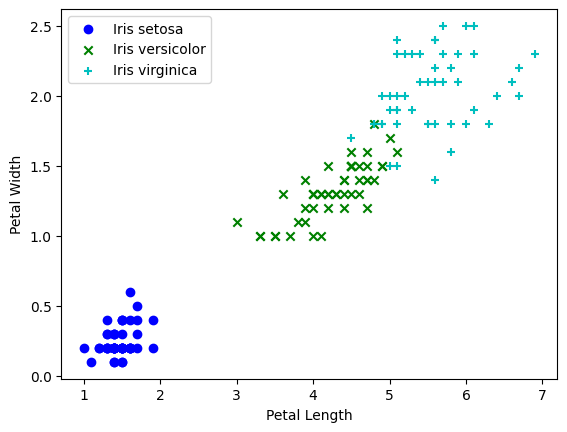

In [72]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
'''
ref1: https://en.wikipedia.org/wiki/Iris_flower_data_set#Data_set
ref2: https://gist.github.com/curran/a08a1080b88344b0c8a7#file-iris-csv
'''

#1
def load_Iris(shuffle=True):   
    label={'setosa':0, 'versicolor':1, 'virginica':2}
    fileName = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
    df = pd.read_csv(fileName, header=0, converters={4: lambda name: label[name]})
    data = df.values
    if shuffle:
        np.random.shuffle(data)
    return data

##iris_data = load_Iris(shuffle=True)    
iris_data = load_Iris()
X      = iris_data[:,:-1]
y_true = iris_data[:, -1]
    
print("X.shape:", X.shape)
print("y_true.shape:", y_true.shape)
print(X[:3])
print(y_true[:3])

#2
markers= "ox+*sd"
colors = "bgcmyk"
labels = ["Iris setosa","Iris versicolor", "Iris virginica"]

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
for i, k in enumerate(np.unique(y_true)):
  plt.scatter(X[y_true== k, 0], # Sepal Length
              X[y_true== k, 1], # Sepal Width
              c=colors[i], marker=markers[i], label=labels[i])
plt.legend(loc='best')
plt.show()

#3
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
for i, k in enumerate(np.unique(y_true)):
  plt.scatter(X[y_true== k, 2], # Petal Length
              X[y_true== k, 3], # Petal Width
              c=colors[i], marker=markers[i], label=labels[i])
plt.legend(loc='best')
plt.show()

x_train.shape: (120, 4)
y_train.shape: (120,)
x_test.shape: (30, 4)
y_test.shape: (30,)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                50        
                                                                 
 dense_10 (Dense)            (None, 3)                 33        
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________
len(model.layers): 2


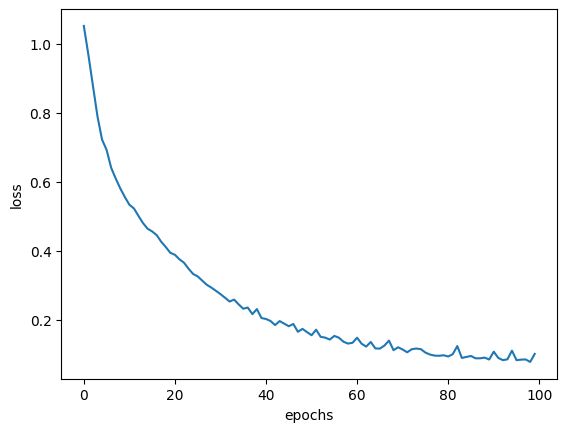

4/4 - 0s - loss: 0.0846 - accuracy: 0.9750 - 95ms/epoch - 24ms/step
1/1 - 0s - loss: 0.1312 - accuracy: 0.9333 - 15ms/epoch - 15ms/step
4/4 [==============================] - 0s 0s/step
confusion_matrix(C): tf.Tensor(
[[36  0  0]
 [ 0 33  3]
 [ 0  0 48]], shape=(3, 3), dtype=int32)


In [73]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#1
def load_Iris(shuffle=True):   
    label={'setosa':0, 'versicolor':1, 'virginica':2}
    fileName = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
    df = pd.read_csv(fileName, header=0, converters={4: lambda name: label[name]})
    data = df.values
    if shuffle:
        np.random.shuffle(data)
    return data

def train_test_data_set(iris_data, test_rate=0.2): # train: 0.8, test: 0.2
    n = int(iris_data.shape[0]*(1-test_rate))
    x_train = iris_data[:n,:-1]
    y_train = iris_data[:n, -1]
    
    x_test = iris_data[n:,:-1]
    y_test = iris_data[n:,-1]
    return (x_train, y_train), (x_test, y_test)
    
iris_data = load_Iris(shuffle=True)
(x_train, y_train), (x_test, y_test) = train_test_data_set(iris_data, test_rate=0.2)
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)
print("x_test.shape:",  x_test.shape)
print("y_test.shape:",  y_test.shape)
  
# one-hot encoding: 'mse', 'categorical_crossentropy'  
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
##print("y_train=", y_train)
##print("y_test=", y_test)

#2
n = 10  # number of neurons in a hidden layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=n, input_dim=4, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))
model.summary()

#3
def MSE(y, t):
    return tf.reduce_mean(tf.square(y - t)) # (y - t)**2

CCE = tf.keras.losses.CategoricalCrossentropy()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
##model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
##model.compile(optimizer=opt, loss= MSE, metrics=['accuracy'])
##model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=opt, loss= CCE, metrics=['accuracy'])

ret = model.fit(x_train, y_train, epochs=100, verbose=0) # batch_size=32
print("len(model.layers):", len(model.layers))  # 2
loss = ret.history['loss']
plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

#4
##print(model.get_weights())
##for i in range(len(model.layers)):
##    print("layer :", i, '-'*20)
##    w = model.layers[i].weights[0].numpy()
##    b = model.layers[i].bias.numpy()
##    print("weights[{}]: {}".format(i, np.array2string(w)))
##    print("bias[{}]:    {}".format(i, np.array2string(b)))

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
y_pred = model.predict(x_train)
y_label = np.argmax(y_pred, axis = 1)
C = tf.math.confusion_matrix(np.argmax(y_train, axis = 1), y_label)
print("confusion_matrix(C):", C)

https://pandas.pydata.org/docs/reference/api/pandas.plotting.radviz.html

Plot a multidimensional dataset in 2D.

In [74]:
from pandas.plotting import radviz, scatter_matrix

fileName = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
df = pd.read_csv(fileName, header=0, converters={4: lambda name: label[name]})

fig, ax = plt.subplots(figsize=(8,6))
radviz(df, "species", ax=ax)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices


Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

explained variance ratio (first two components): [0.92461872 0.05306648]


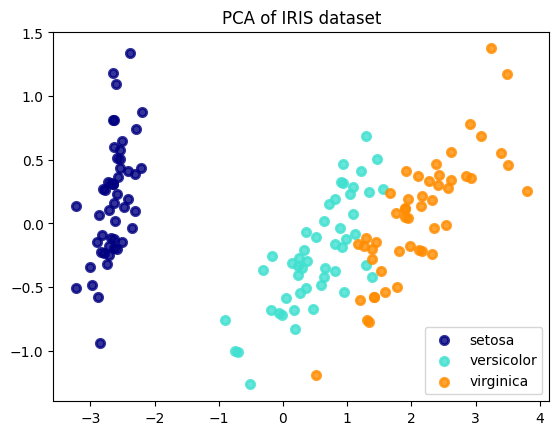

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")
plt.show()